In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('auto-mpg.csv')

In [2]:
data['horsepower'] = data['horsepower'].replace({'?':np.NaN})
data['horsepower'] = data['horsepower'].fillna(150)

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
data['horsepower'] = data['horsepower'].astype('str').astype('int')

In [5]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
l = []
for i in data['car name']:
    l.append(i.split()[0])

In [7]:
data['company_name'] = pd.DataFrame(l, columns = ['car name'])

In [8]:
#ford
#chevrolet ---> chevroelt--> chevroelt
#plymouth
#toyota ---> toyouta
#volkswagen --> vokswagen
#mazda ---> maxda

In [9]:
data['company_name'] = data['company_name'].replace(['maxda','vokswagen','toyouta'],['mazda','volkswagen','toyota'])

In [10]:
data = data.drop(['car name'], axis  = 1)

In [11]:
data.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,company_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick


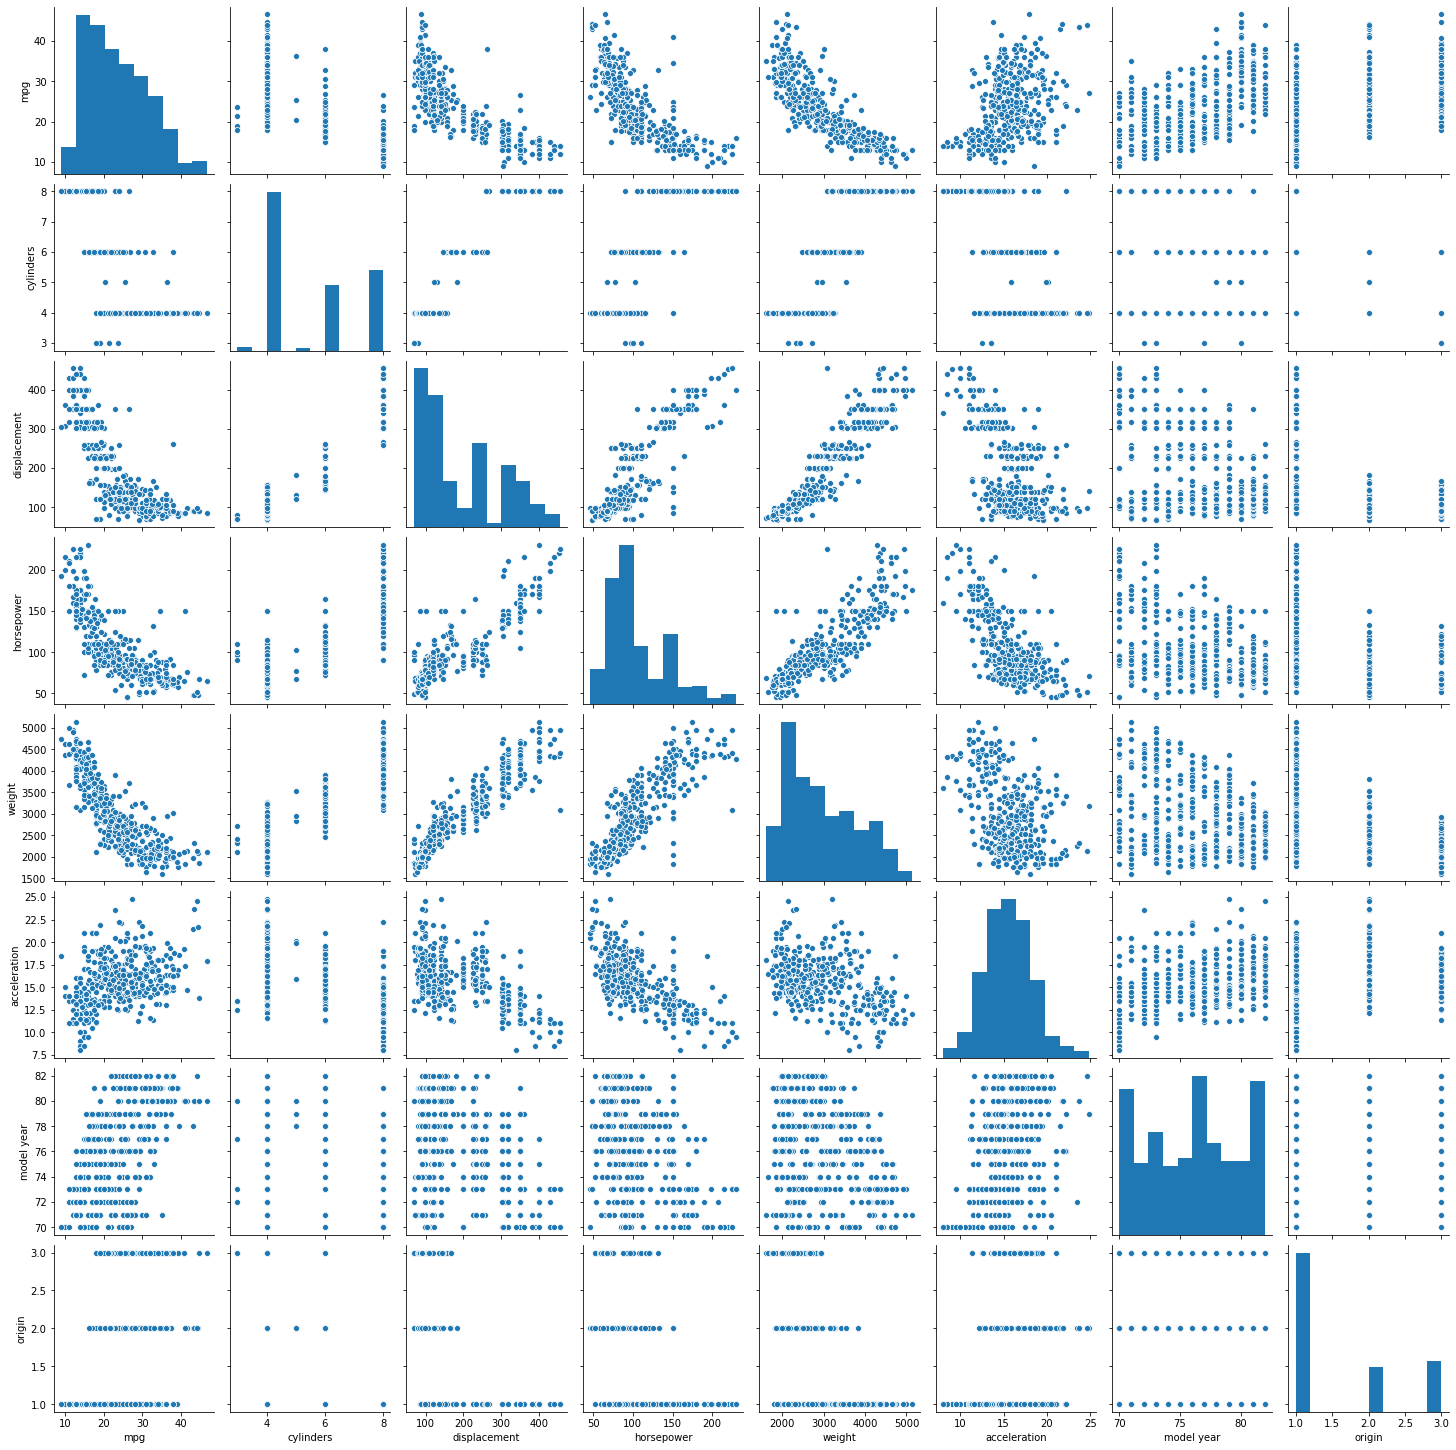

In [12]:
import seaborn as sns
sns.pairplot(data)

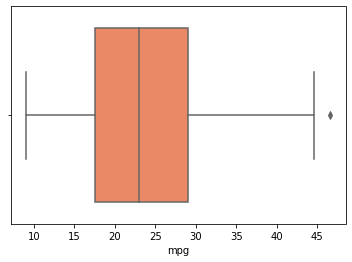

In [13]:
import seaborn as sns
sns.boxplot(data['mpg'], color = 'coral')

# Heat map

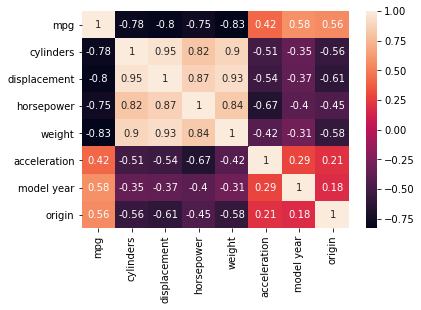

In [14]:
sns.heatmap(data.corr(), annot= True)

In [15]:
x = data.drop(['mpg'], axis = 1)
y = data['mpg']

In [16]:
#col = ['displacement','horsepower','weight']

In [17]:
#x['displacement'] = np.log(x['displacement'])
#x['horsepower'] = np.log(x['horsepower'])
#x['weight'] = np.log(x['weight'])

In [18]:
dummy = pd.get_dummies(x['company_name'],drop_first= True)

In [19]:
x = pd.concat([x.drop(['company_name'], axis = 1),dummy], axis = 1)

# splitting data

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=1, test_size=0.2 )

In [21]:
x

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,audi,bmw,buick,...,plymouth,pontiac,renault,saab,subaru,toyota,triumph,volkswagen,volvo,vw
0,8,307.0,130,3504,12.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,350.0,165,3693,11.5,70,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,8,318.0,150,3436,11.0,70,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,8,304.0,150,3433,12.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,302.0,140,3449,10.5,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394,4,97.0,52,2130,24.6,82,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
395,4,135.0,84,2295,11.6,82,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,4,120.0,79,2625,18.6,82,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Creating models

In [22]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression().fit(x_train,y_train)

In [23]:
y_predict_test = model1.predict(x_test)
y_predict_train = model1.predict(x_train)


In [24]:
from sklearn.metrics import r2_score
print('test score ----> ',r2_score(y_test,y_predict_test))
print('train score ---> ',r2_score(y_train,y_predict_train))

test score ---->  0.8733920820397243
train score --->  0.8447758299979087


In [25]:
linear_test = r2_score(y_test,y_predict_test)
linear_train = r2_score(y_train,y_predict_train)

In [26]:
from sklearn.ensemble import AdaBoostRegressor
model2 = AdaBoostRegressor().fit(x_train,y_train)
y_predict_test = model2.predict(x_test)
y_predict_train = model2.predict(x_train)

In [27]:
from sklearn.metrics import r2_score
print('test score ----> ',r2_score(y_test,y_predict_test))
print('train score ---> ',r2_score(y_train,y_predict_train))

test score ---->  0.8502095177520886
train score --->  0.9037357379431654


In [28]:
adaboost_test = r2_score(y_test,y_predict_test)
adaboost_train = r2_score(y_train,y_predict_train)

In [29]:
from xgboost import XGBRegressor 
model3 = XGBRegressor().fit(x_train,y_train)
y_predict_test = model3.predict(x_test)
y_predict_train = model3.predict(x_train)

In [30]:
from sklearn.metrics import r2_score
print('test score ----> ',r2_score(y_test,y_predict_test))
print('train score ---> ',r2_score(y_train,y_predict_train))

test score ---->  0.8954241920936383
train score --->  0.9999503471882644


In [31]:
xgb_test = r2_score(y_test,y_predict_test)
xgb_train = r2_score(y_train,y_predict_train)

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [33]:
tuned_parameters = [{'n_estimators': [60,85,100,120],
                    'min_samples_split': [14,15,20,22,25],
                    'max_depth': [11,12,13,15,18,16]}]

In [34]:
grid = GridSearchCV(estimator = RandomForestRegressor(),
                   param_grid = tuned_parameters,
                   cv = 10)

In [35]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [11, 12, 13, 15, 18, 16],
                          'min_samples_split': [14, 15, 20, 22, 25],
                          'n_estimators': [60, 85, 100, 120]}])

In [36]:
grid.best_params_

{'max_depth': 15, 'min_samples_split': 15, 'n_estimators': 85}

In [37]:
model4 = RandomForestRegressor(max_depth= 11, min_samples_split =  14, n_estimators =  120).fit(x_train,y_train)

In [38]:
y_predict_test = model4.predict(x_test)
y_predict_train = model4.predict(x_train)

In [39]:
from sklearn.metrics import r2_score
print('test score ----> ',r2_score(y_test,y_predict_test))
print('train score ---> ',r2_score(y_train,y_predict_train))

test score ---->  0.902359462710412
train score --->  0.9428353795248905


In [40]:
random_test = r2_score(y_test,y_predict_test)
random_train = r2_score(y_train,y_predict_train)

In [41]:
from sklearn.neighbors import KNeighborsRegressor
parameters = {'n_neighbors':[4,5,6,7,8], 'metric' : ['minkowski','Euclidean'],'algorithm': ['ball_tree', 'kd_tree']}

In [42]:
grid = GridSearchCV(estimator = KNeighborsRegressor(),
                   param_grid = parameters,
                   cv = 10)
grid.fit(x_train,y_train)

C:\Users\HARI KRISHNA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HARI KRISHNA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HARI KRISHNA\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "C:\Users\HARI KRISHNA\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "C:\Users\HARI KRISHNA\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 342, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'Euclidean' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid 

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'metric': ['minkowski', 'Euclidean'],
                         'n_neighbors': [4, 5, 6, 7, 8]})

In [43]:
grid.best_params_

{'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 7}

In [44]:
model5 = KNeighborsRegressor(n_neighbors=7, algorithm =  'ball_tree', metric =  'minkowski').fit(x_train,y_train)

In [45]:
y_predict_test = model5.predict(x_test)
y_predict_train = model5.predict(x_train)

In [46]:
from sklearn.metrics import r2_score
print('test score ----> ',r2_score(y_test,y_predict_test))
print('train score ---> ',r2_score(y_train,y_predict_train))

test score ---->  0.8041622403927575
train score --->  0.7633275213656368


In [47]:
knn_test = r2_score(y_test,y_predict_test)
knn_train = r2_score(y_train,y_predict_train)

In [48]:
linear_train
adaboost_train
xgb_train
random_train
knn_train

0.7633275213656368

In [49]:
w = ['linear','adaboost','xgb','random','knn']
h = [linear_train,adaboost_train,xgb_train,random_train,knn_train]
h2 = [linear_test,adaboost_test,xgb_test,random_test,knn_test]

Text(0.5, 1.0, 'testing score')

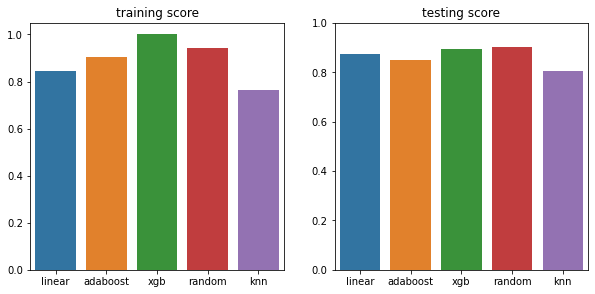

In [56]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]
import matplotlib.pyplot as plt
plt.subplot(2,2,1)
sns.barplot(w,h)
plt.title('training score')
plt.subplot(2,2,2)
plt.ylim(0,1)
sns.barplot(w,h2)
plt.title('testing score')


adaboost and random forest models having good score